In [1]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [2]:
# importing libraries
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import nltk
from sklearn.preprocessing import LabelEncoder   # for encoding target variable
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# to interact with the operating system's file system
import os

# get the parent directory path
parent_directory = os.getcwd()

# paths
data_path = os.path.join(parent_directory, 'data')
model_path = os.path.join(parent_directory, 'model') 

In [5]:
# Reading file
df = pd.read_csv(os.path.join(data_path, 'spam.csv'), encoding = "ISO-8859-1")
df = df.iloc[:,:2]

In [6]:
df.shape

(5572, 2)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 1. Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# rename columns
df = df.rename(columns = {'v1': 'target', 'v2': 'text'})
df.sample(5)

,target,text
1079,ham,Me too watching surya movie only. . .after 6 p...
78,ham,Does not operate after &lt;#&gt; or what
4037,ham,Hope you are not scared!
1729,ham,Lol yeah at this point I guess not
949,ham,Is that what time you want me to come?


In [10]:
# encoding target variable
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
3921,0,"Oh really? perform, write a paper, go to a mov..."
582,1,We tried to contact you re your reply to our o...
3015,0,"&lt;#&gt; is fast approaching. So, Wish u a v..."
1214,0,I'll text now! All creepy like so he won't thi...
1126,0,Not tonight mate. Catching up on some sleep. T...


ham: 0

spam: 1

In [11]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

403

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

## 2. EDA

In [14]:
# value counts
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

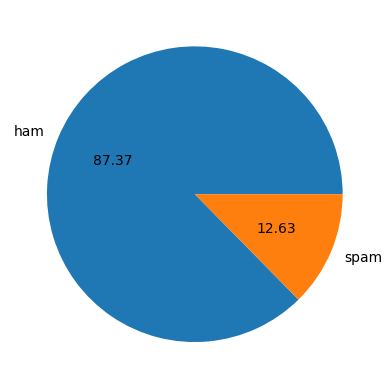

In [15]:
# plotting pie chart
plt.pie(df['target'].value_counts(),   
        labels = ['ham','spam'],   # legend
        autopct = "%0.2f")   # to display percent value
plt.show()

Data is imbalanced.

In [16]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [17]:
# number of characters in each text
df['num_characters'] = df['text'].apply(len)

# number of words in each text
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# number of sentences in each text
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [19]:
# describe
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


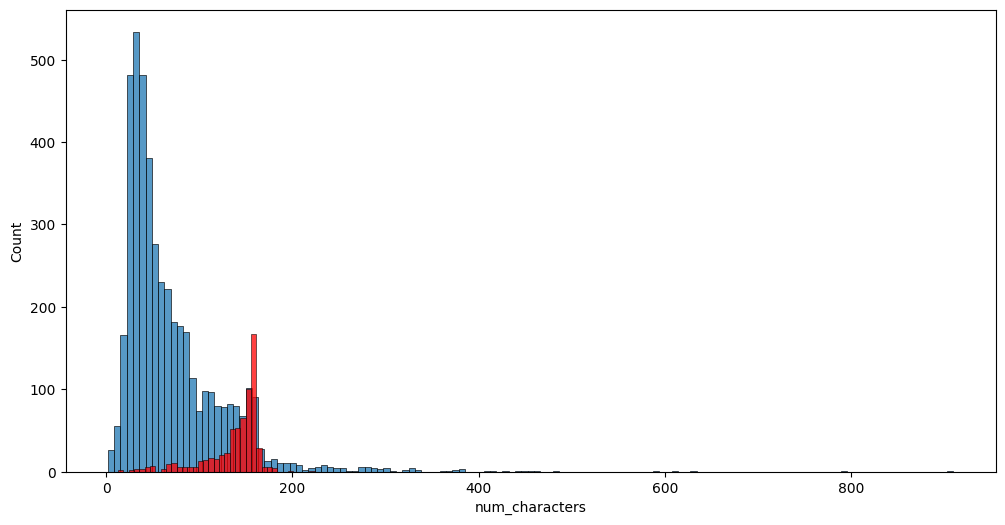

In [22]:
# figure size
plt.figure(figsize=(12,6))

# histplot for number of characters
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

plt.show()

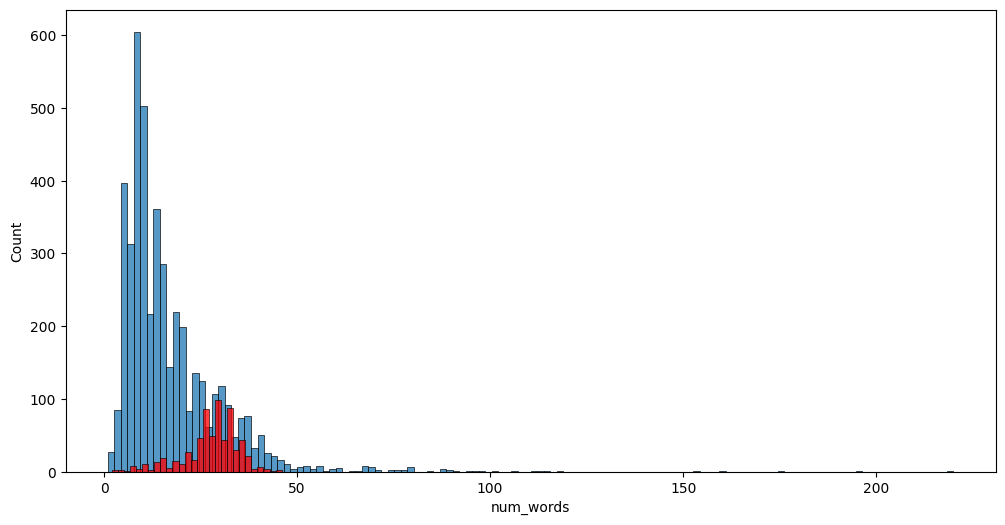

In [23]:
# figure size
plt.figure(figsize=(12,6))

# histplot for number of words
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

plt.show()

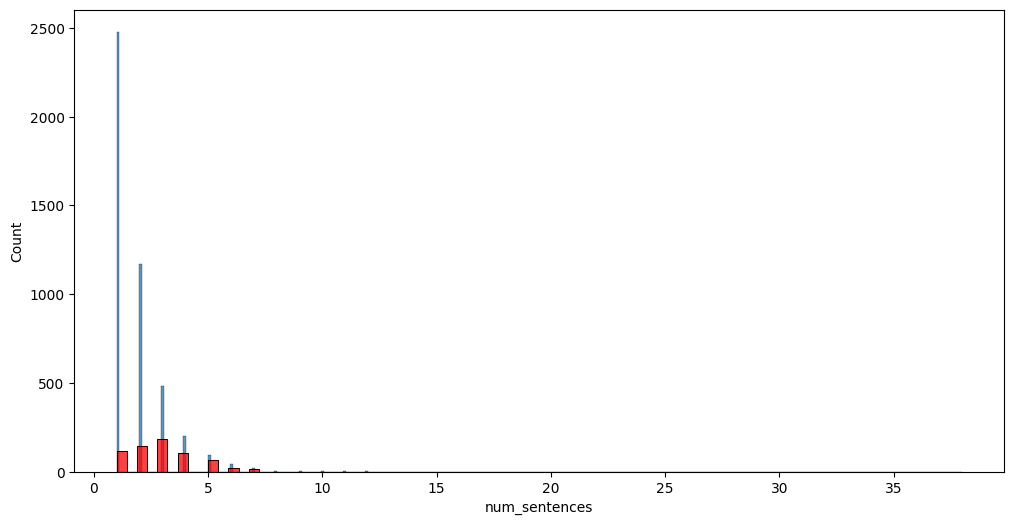

In [24]:
# figure size
plt.figure(figsize=(12,6))

# histplot for number of sentences
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

plt.show()

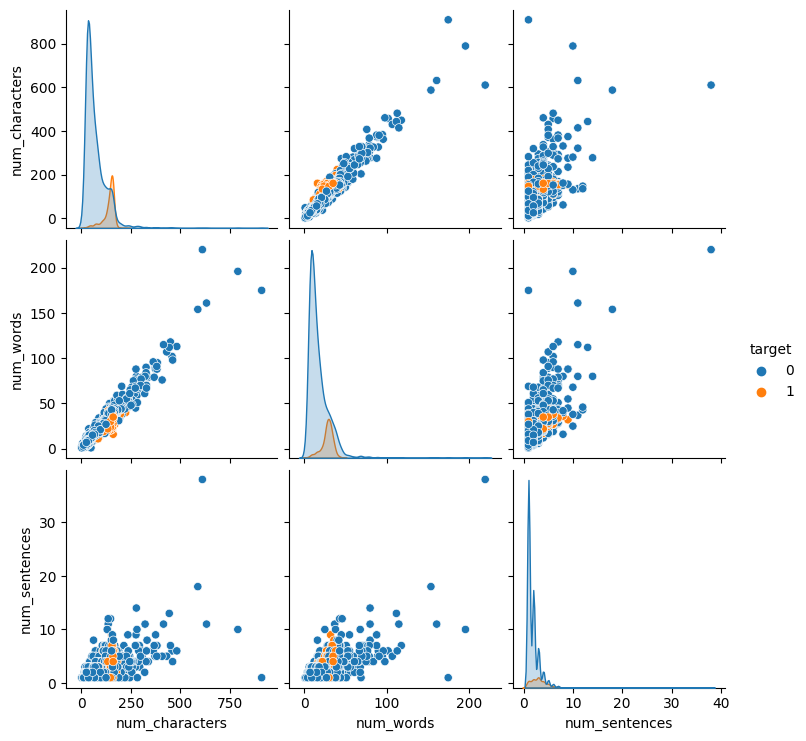

In [25]:
sns.pairplot(df, hue='target')
plt.show()

In [32]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: >

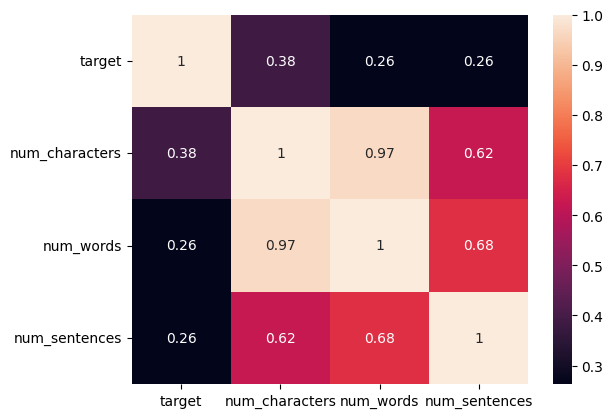

In [33]:
sns.heatmap(df.drop('text',axis=1).corr(),annot=True)

## 3. Data Preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [34]:
def transform_text(text):
    """ Function to perform data preprocessing """
    
    # lower the text
    text = text.lower()
    
    # word tokenization
    text = nltk.word_tokenize(text)
    
    # fetching alpha numeric characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # clear y
    text = y[:]
    y.clear()
    
    # fetching words that are not stopwords and that are not punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # clear y
    text = y[:]
    y.clear()
    
    # stemming
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    # converting list to string
    return " ".join(y)

In [35]:
# applying above function
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
1096,1,Dear Subscriber ur draw 4 å£100 gift voucher w...,142,28,3,dear subscrib ur draw 4 gift voucher b enter r...
1135,0,K do I need a login or anything,31,8,1,k need login anyth
3118,0,Stop knowing me so well!,24,6,1,stop know well
3813,0,Can. Dunno wat to get 4 her...,30,9,2,dunno wat get 4
3295,0,Hi there. We have now moved in2 our pub . Woul...,80,23,3,hi move in2 pub would great 2 c u u cud come


In [37]:
# creating object of WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')

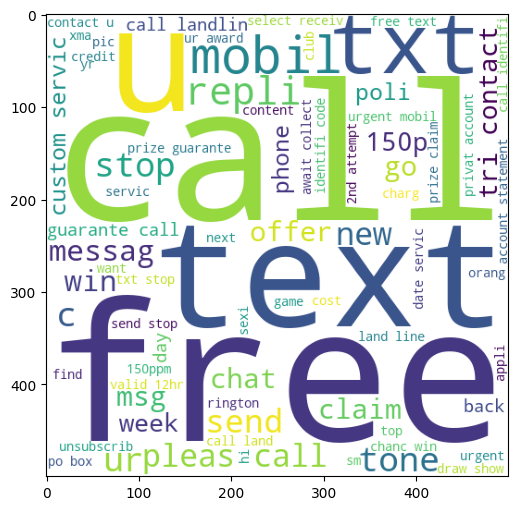

In [38]:
# generate wordcloud for spam messages 

# fetching string and concatenate and seperate by space
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

# figure size
plt.figure(figsize=(15,6))

# display wordcloud
plt.imshow(spam_wc)

plt.show()

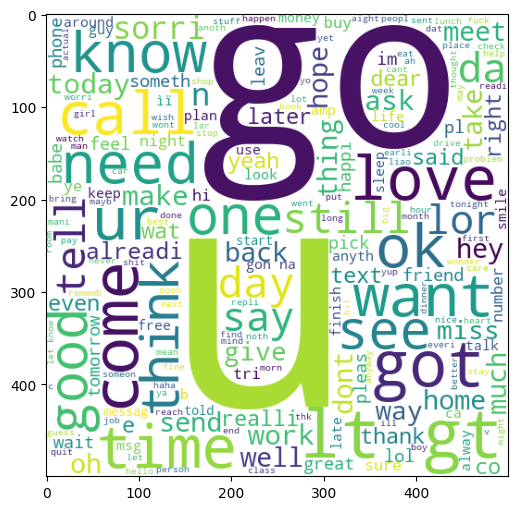

In [39]:
# generate wordcloud for ham messages 

# fetching string and concatenate and seperate by space
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

# figure size
plt.figure(figsize=(15,6))

# display wordcloud
plt.imshow(ham_wc)

plt.show()

In [40]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [41]:
# words that are coming maximum times in spam messages

spam = []
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():   # splitting every word
        spam.append(word)

In [42]:
spam

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [43]:
# most frequent 30 words
spam_counter = pd.DataFrame(Counter(spam).most_common(30))
spam_counter.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [66]:
spam_counter.columns = ['word', 'count']

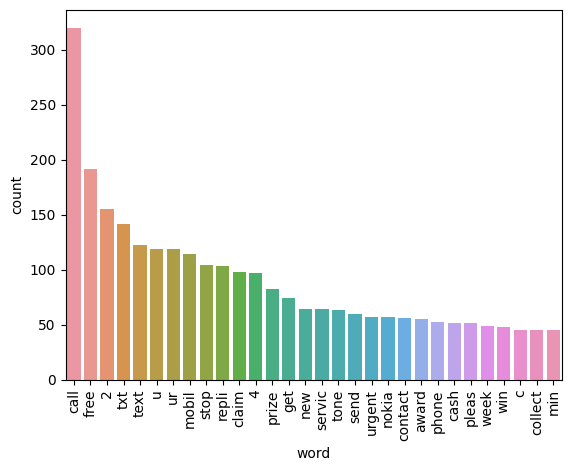

In [69]:
# plotting most frequent 30 words in spam
# sns.barplot(spam_counter[0], spam_counter[1])
sns.barplot(data=spam_counter, x="word", y="count")

# rotating the x-axis feature to vertical
plt.xticks(rotation = 'vertical')

plt.show()

In [70]:
# words that are coming maximum times in ham messages

ham = []
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for word in msg.split():   # splitting every word
        ham.append(word)

In [71]:
ham

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [72]:
# most frequent 30 words
ham_counter = pd.DataFrame(Counter(ham).most_common(30))
ham_counter.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


In [74]:
ham_counter.columns = ['word', 'count']

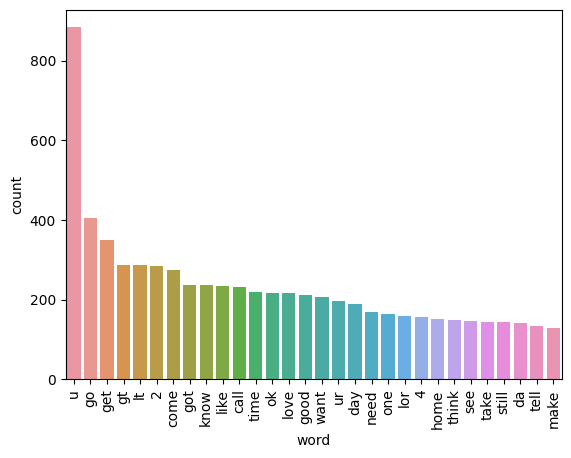

In [75]:
# plotting most frequent 30 words in ham
# sns.barplot(ham_counter[0], ham_counter[1])
sns.barplot(data=ham_counter, x="word", y="count")

# rotating the x-axis feature to vertical
plt.xticks(rotation = 'vertical')

plt.show()

## 4. Model Building

Naive Bayes works better on textual data

In [76]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
3223,0,Sorry da thangam.it's my mistake.,33,7,1,sorri da mistak
3851,0,"No, its true..k,Do u knw dis no. &lt;#&gt; ?",44,21,2,true k u knw di lt gt
253,0,"Ups which is 3days also, and the shipping comp...",179,40,2,up 3day also ship compani take 2wk way usp tak...
433,0,Booked ticket for pongal?,25,5,1,book ticket pongal
4117,0,Watch lor. I saw a few swatch one i thk quite ...,87,22,2,watch lor saw swatch one thk quit ard 116 need...


In [77]:
# Vectorization

# CountVectorizer that using bag of words
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [78]:
# Features
X = tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)
X

(5169, 3000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
# Target
y = df['target'].values
print(y.shape)
y

(5169,)


array([0, 0, 1, ..., 0, 0, 0])

In [80]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [81]:
# creating instances
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### Model 1

In [82]:
# fitting
gnb.fit(X_train, y_train)

# predicting
y_pred1 = gnb.predict(X_test)

# Accuracy
print("Gaussian Naive Bayes scores: \n")
print("Accuracy test: ", accuracy_score(y_test,y_pred1))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred1))
print("Precision Score: ", precision_score(y_test,y_pred1))

Gaussian Naive Bayes scores: 

Accuracy test:  0.8694390715667312
Confusion Matrix: 
 [[788 108]
 [ 27 111]]
Precision Score:  0.5068493150684932


### Model 2

In [83]:
# fitting
mnb.fit(X_train, y_train)

# predicting
y_pred2 = mnb.predict(X_test)

# Accuracy
print("Multinomial Naive Bayes scores: \n")
print("Accuracy test: ", accuracy_score(y_test,y_pred2))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred2))
print("Precision Score: ", precision_score(y_test,y_pred2))

Multinomial Naive Bayes scores: 

Accuracy test:  0.9709864603481625
Confusion Matrix: 
 [[896   0]
 [ 30 108]]
Precision Score:  1.0


### Model 3

In [84]:
# fitting
bnb.fit(X_train, y_train)

# predicting
y_pred3 = bnb.predict(X_test)

# Accuracy
print("Bernoulli Naive Bayes scores: \n")
print("Accuracy test: ", accuracy_score(y_test,y_pred3))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred3))
print("Precision Score: ", precision_score(y_test,y_pred3))

Bernoulli Naive Bayes scores: 

Accuracy test:  0.9835589941972921
Confusion Matrix: 
 [[895   1]
 [ 16 122]]
Precision Score:  0.991869918699187


 Chosing mnb using tfidf as precision is more important in this case

### Various Models

In [85]:
# using different models and creating instances
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
# dictionary for different models used
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    """ This function takes different classifiers and return accuracy and precision """
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
# accuracy and precision for all classifiers

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - \n",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision - 
 0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision - 
 1.0
For  NB
Accuracy -  0.9709864603481625
Precision - 
 1.0
For  DT
Accuracy -  0.9303675048355899
Precision - 
 0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision - 
 0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision - 
 0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision - 
 0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision - 
 0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision - 
 0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision - 
 0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision - 
 0.9333333333333333


In [89]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


Naive Bayes is performing well.


On scaling precision becomes low.

Tried voting classifier but precision goes down.

In [90]:
import pickle
pickle.dump(tfidf, open(os.path.join(model_path, 'vectorizer.pkl'), 'wb'))
pickle.dump(mnb,open(os.path.join(model_path, 'model.pkl'),'wb'))